In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Read the data
# data = pd.read_csv('top_500_artists_deduplicate.csv')
data = pd.read_csv('top_500_artists.csv')
print(data.shape)
data.head()

(5000, 15)


,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Jimmy Cooks (feat. 21 Savage),"Honestly, Nevermind",Drake,2022-06-17,218364,91,0.529,0.000307,0.673,0.000002,0.0930,-4.711,0.1750,165.921,4
1,WAIT FOR U (feat. Drake & Tems),I NEVER LIKED YOU,Future,2022-04-29,189893,90,0.463,0.314000,0.642,0.000000,0.0686,-4.474,0.3400,83.389,4
2,One Dance,Views,Drake,2016-05-06,173986,86,0.792,0.007760,0.625,0.001800,0.3290,-5.609,0.0536,103.967,4
3,Knife Talk (with 21 Savage ft. Project Pat),Certified Lover Boy,Drake,2021-09-03,242965,85,0.849,0.063500,0.424,0.000000,0.0834,-9.579,0.3240,145.887,4
4,God's Plan,Scorpion,Drake,2018-06-29,198973,85,0.754,0.033200,0.449,0.000083,0.5520,-9.211,0.1090,77.169,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5000 non-null   object 
 1   album             5000 non-null   object 
 2   artist            5000 non-null   object 
 3   release_date      5000 non-null   object 
 4   length            5000 non-null   int64  
 5   popularity        5000 non-null   int64  
 6   danceability      5000 non-null   float64
 7   acousticness      5000 non-null   float64
 8   energy            5000 non-null   float64
 9   instrumentalness  5000 non-null   float64
 10  liveness          5000 non-null   float64
 11  loudness          5000 non-null   float64
 12  speechiness       5000 non-null   float64
 13  tempo             5000 non-null   float64
 14  time_signature    5000 non-null   int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 586.1+ KB


In [4]:
data.describe()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,217217.725800,71.696000,0.644699,0.227273,0.661915,0.019768,0.187397,-6.402226,0.098065,121.647327,3.950400
std,55830.453277,8.196134,0.150887,0.248966,0.183158,0.106006,0.154286,2.993349,0.102696,28.698703,0.310418
min,69900.000000,14.000000,0.079300,0.000005,0.002290,0.000000,0.015700,-39.627000,0.023200,42.741000,1.000000
25%,181714.000000,67.000000,0.551000,0.030850,0.547000,0.000000,0.094775,-7.595000,0.037700,99.157750,4.000000
50%,210006.500000,72.000000,0.662000,0.126000,0.686000,0.000000,0.125000,-5.829500,0.056000,120.030000,4.000000
75%,240300.500000,77.000000,0.754250,0.356000,0.800000,0.000079,0.232000,-4.483000,0.112000,139.994000,4.000000
max,811077.000000,100.000000,0.970000,0.995000,0.996000,0.982000,0.977000,0.175000,0.961000,220.099000,5.000000


In [21]:
artist_pop['count'][data['artist']]

artist
Drake              20
Future              8
Drake              20
Drake              20
Drake              20
                   ..
Aminé               8
Various Artists    56
Aminé               8
Bea Miller          1
Aminé               8
Name: count, Length: 5000, dtype: int64

In [27]:
(
    ).shape

(5000,)

In [29]:
artist_pop = data.groupby('artist')['popularity'].agg(['mean', 'count'])
data['centralized_popularity'] = data['popularity'] - artist_pop['mean'][data['artist']].values
data['mean_other_song_popularity'] = (artist_pop['mean'][data['artist']].values * artist_pop['count'][data['artist']].values - data['popularity'].values
    ) / (artist_pop['count'][data['artist']].values - 1)

/var/folders/yh/0ppzrrgs7m77v8rxlkjbf2540000gn/T/ipykernel_45836/2812016502.py:3: RuntimeWarning: invalid value encountered in divide
  data['mean_other_song_popularity'] = (artist_pop['mean'][data['artist']].values * artist_pop['count'][data['artist']].values - data['popularity'].values


In [31]:
qt_bins = [0] + np.quantile(data['popularity'],q=[0.3333,0.6667]).tolist() + [100]
print(qt_bins)
data['pop_level'] = pd.cut(data['popularity'], bins=qt_bins, labels=['low', 'medium', 'high'])
data['centralized_pop_level'] = pd.cut(data['centralized_popularity'], bins=[-100,0,100], labels=['low', 'high'])
data['days_since_release'] = data["release_date"].apply(lambda x: (pd.to_datetime('2022-11-01') - pd.to_datetime(x)).days)


[0, 69.0, 75.0, 100]


In [39]:
# data.drop(columns=['centralized_popularity']).to_csv('features_top_500_artists.csv', index=False)
data.to_csv('features_top_500_artists.csv', index=False)

In [34]:
data.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,centralized_popularity,pop_level,days_since_release,centralized_pop_level,mean_other_song_popularity
0,Jimmy Cooks (feat. 21 Savage),"Honestly, Nevermind",Drake,2022-06-17,218364,91,0.529,0.000307,0.673,0.000002,0.0930,-4.711,0.1750,165.921,4,9.05,high,137,high,81.473684
1,WAIT FOR U (feat. Drake & Tems),I NEVER LIKED YOU,Future,2022-04-29,189893,90,0.463,0.314000,0.642,0.000000,0.0686,-4.474,0.3400,83.389,4,9.50,high,186,high,79.142857
2,One Dance,Views,Drake,2016-05-06,173986,86,0.792,0.007760,0.625,0.001800,0.3290,-5.609,0.0536,103.967,4,4.05,high,2370,high,81.736842
3,Knife Talk (with 21 Savage ft. Project Pat),Certified Lover Boy,Drake,2021-09-03,242965,85,0.849,0.063500,0.424,0.000000,0.0834,-9.579,0.3240,145.887,4,3.05,high,424,high,81.789474
4,God's Plan,Scorpion,Drake,2018-06-29,198973,85,0.754,0.033200,0.449,0.000083,0.5520,-9.211,0.1090,77.169,4,3.05,high,1586,high,81.789474


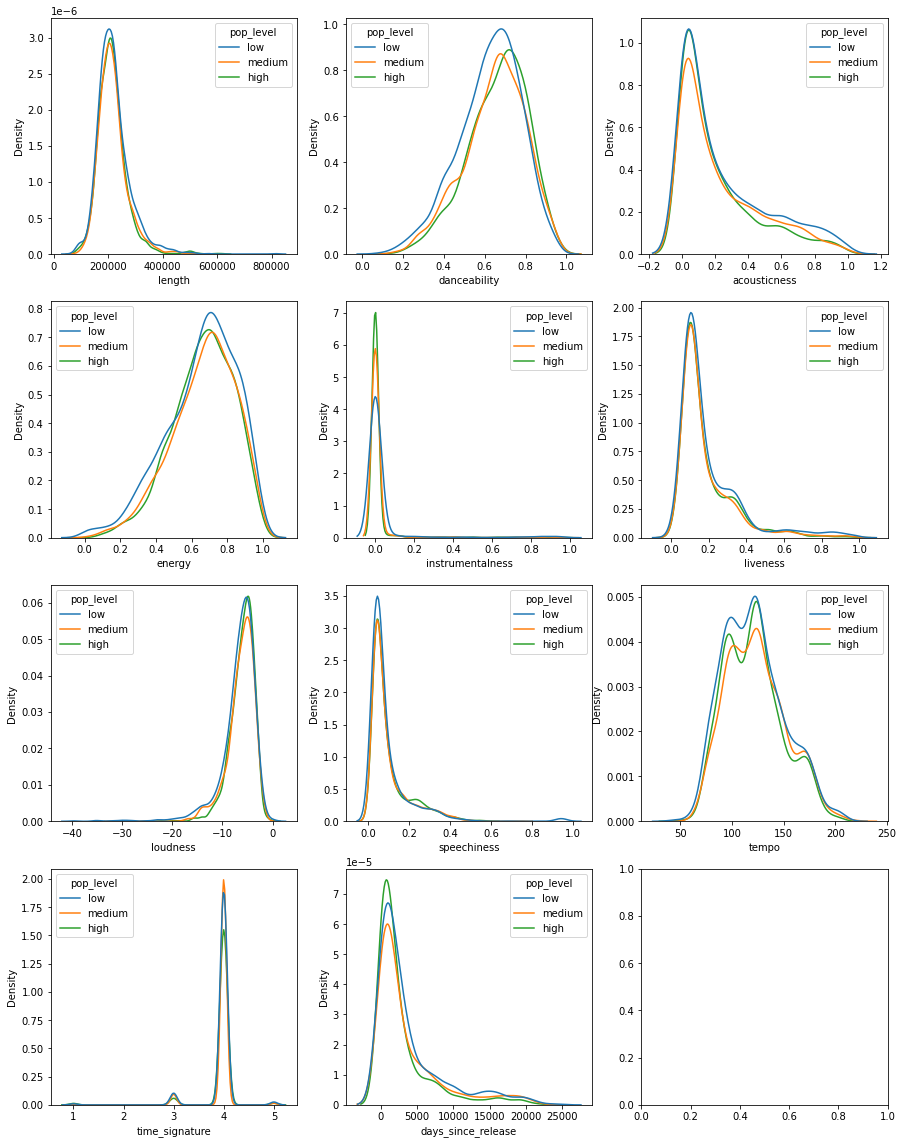

In [35]:
num_features = ['length', 'danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature',
    'days_since_release']
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,20))
axs = [ax for row in axs for ax in row]
for idx, col in enumerate(num_features):
    sns.kdeplot(ax=axs[idx], data=data, x=col, hue='pop_level')
plt.show()

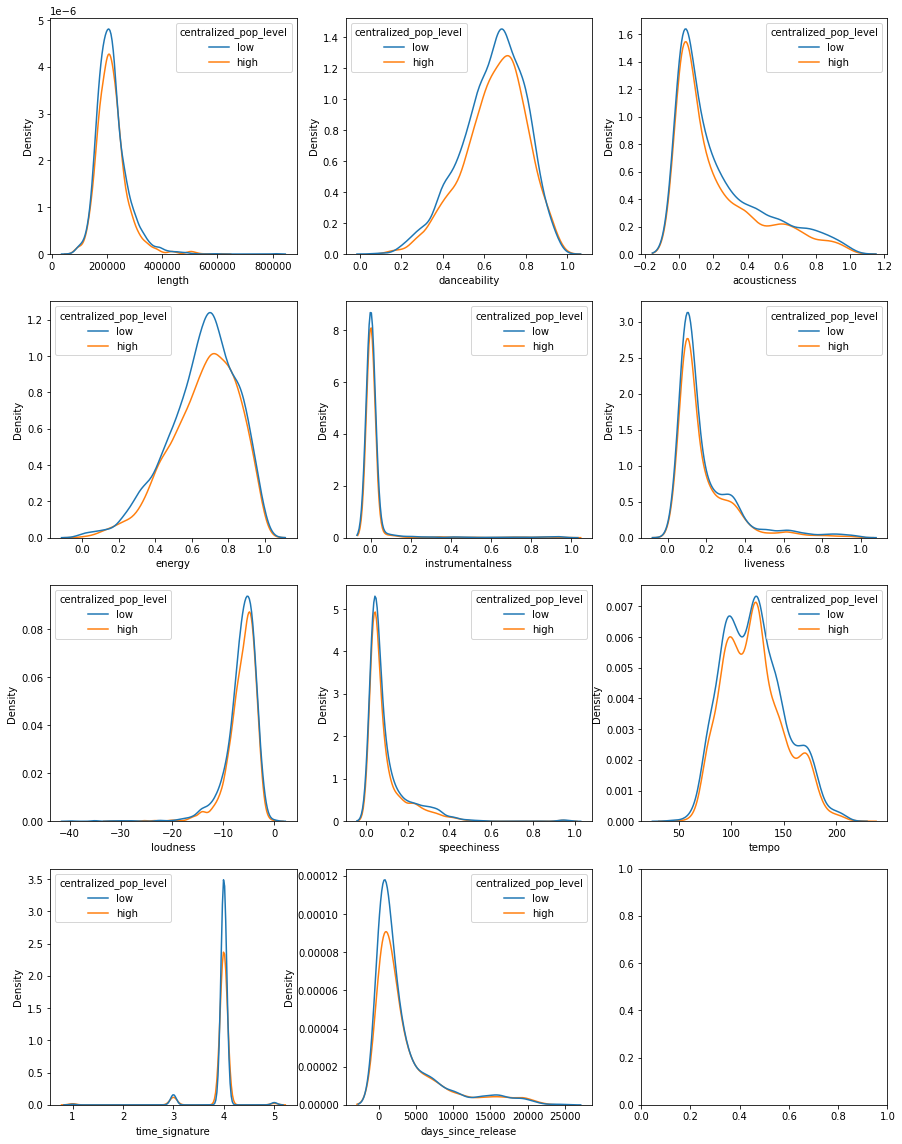

In [36]:
num_features = ['length', 'danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature',
    'days_since_release']
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,20))
axs = [ax for row in axs for ax in row]
for idx, col in enumerate(num_features):
    sns.kdeplot(ax=axs[idx], data=data, x=col, hue='centralized_pop_level')
plt.show()

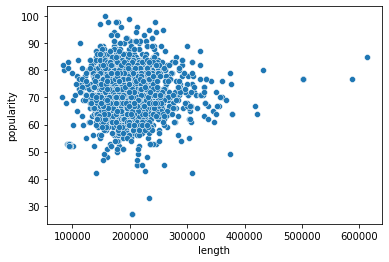

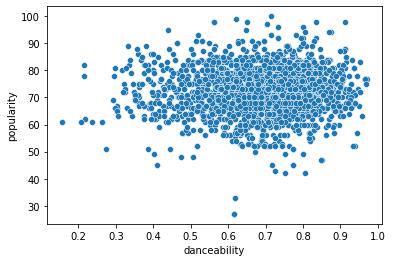

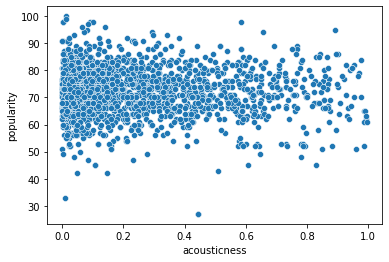

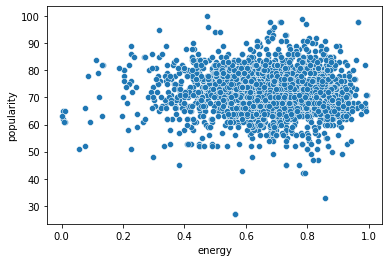

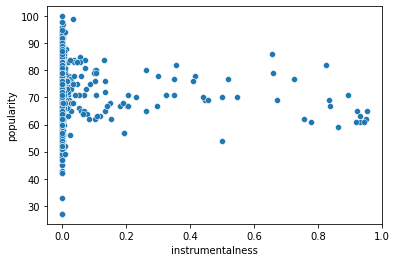

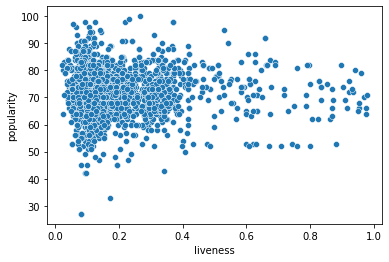

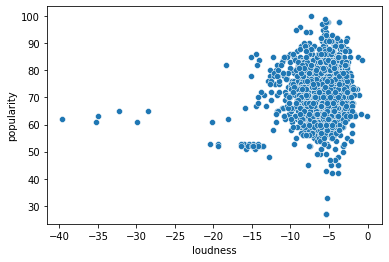

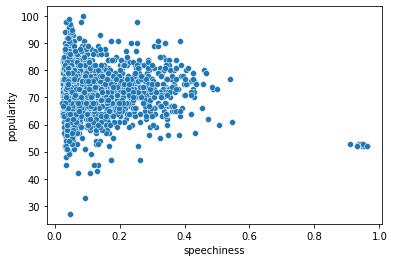

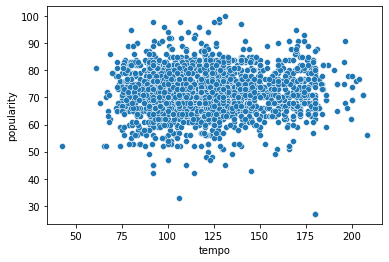

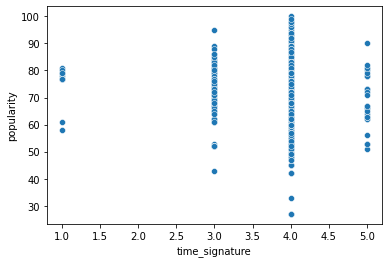

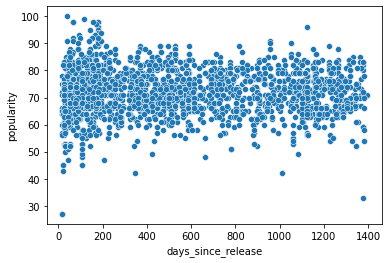

In [41]:
for col in num_features:
    sns.scatterplot(x=col, y='popularity', data=data[data['release_date'] > "2019-01-01"])
    plt.show()


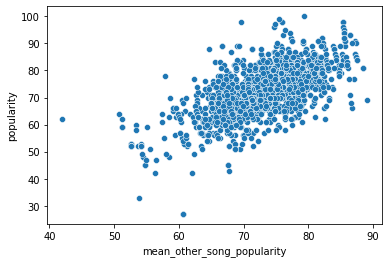

In [40]:
sns.scatterplot(x='mean_other_song_popularity', y='popularity', data=data[data['release_date'] > "2019-01-01"])
plt.show()

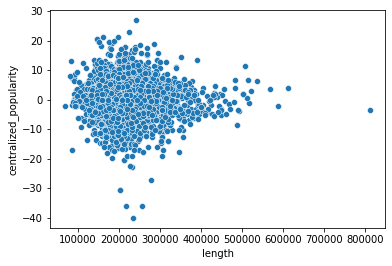

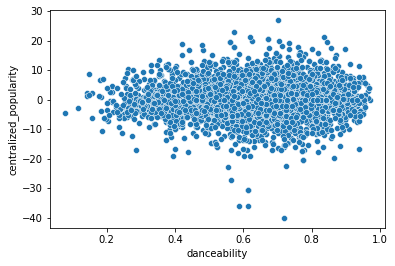

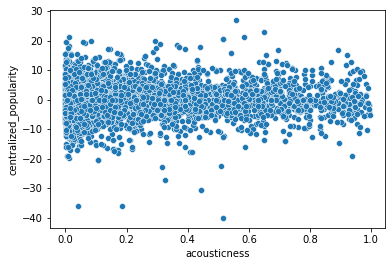

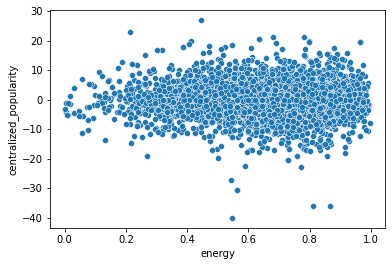

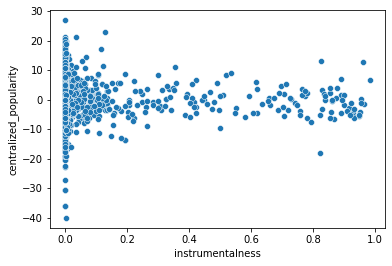

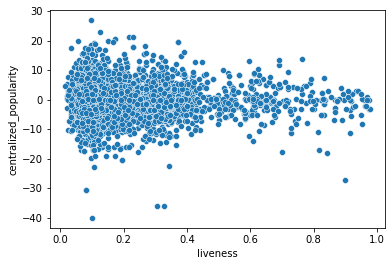

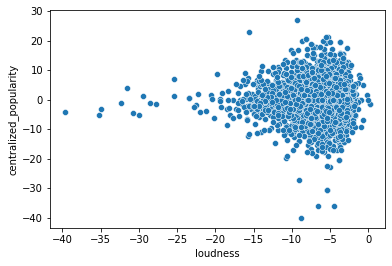

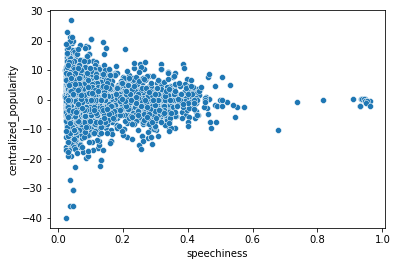

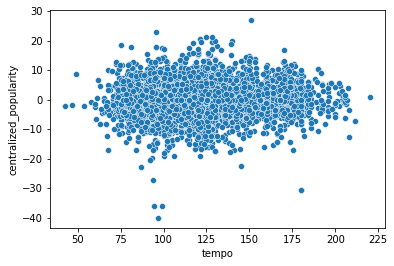

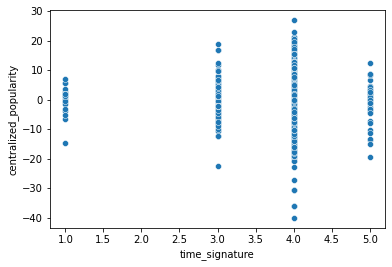

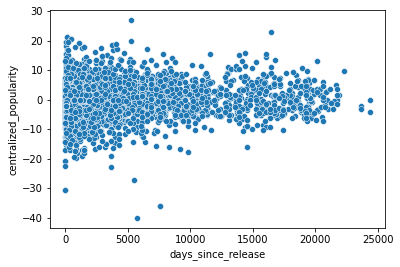

In [42]:
for col in num_features:
    sns.scatterplot(x=col, y='centralized_popularity', data=data)
    plt.show()


In [50]:

data[(data['release_date'] >= "2022-09-01") & (data['release_date'] < "2022-11-01")].to_csv('data3.csv', index=False)
data[(data['release_date'] >= "2022-09-01") & (data['release_date'] < "2022-11-01")].shape

# data[(data['release_date'] >= "2021-06-01") & (data['release_date'] < "2021-09-01")].to_csv('data3.csv', index=False)
# data[(data['release_date'] >= "2021-06-01") & (data['release_date'] < "2021-09-01")].shape

(243, 20)

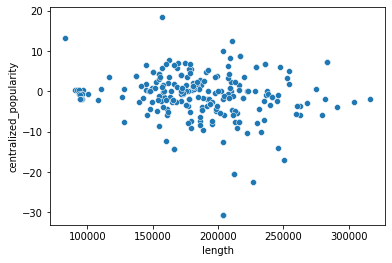

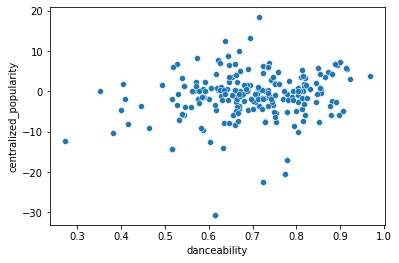

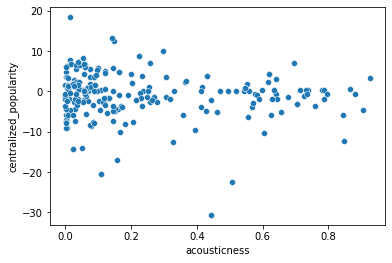

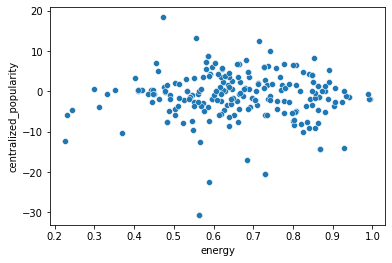

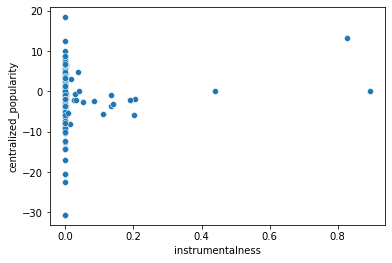

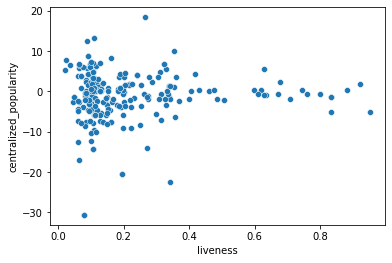

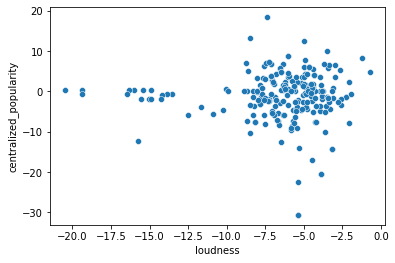

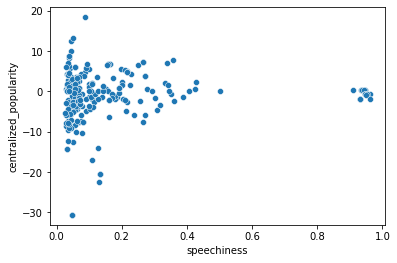

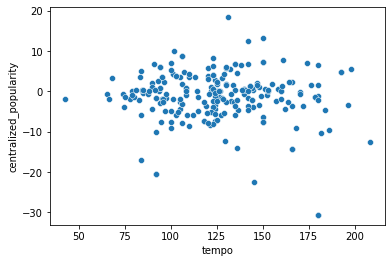

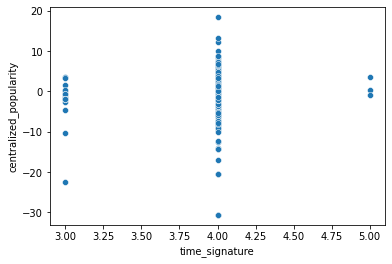

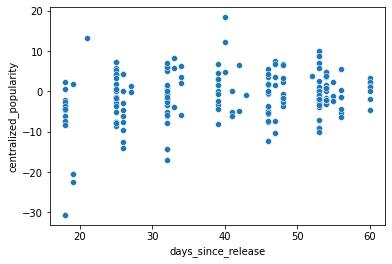

In [45]:
for col in num_features:
    sns.scatterplot(x=col, y='centralized_popularity', data=data[data['release_date'] > "2022-09-01"])
    plt.show()
